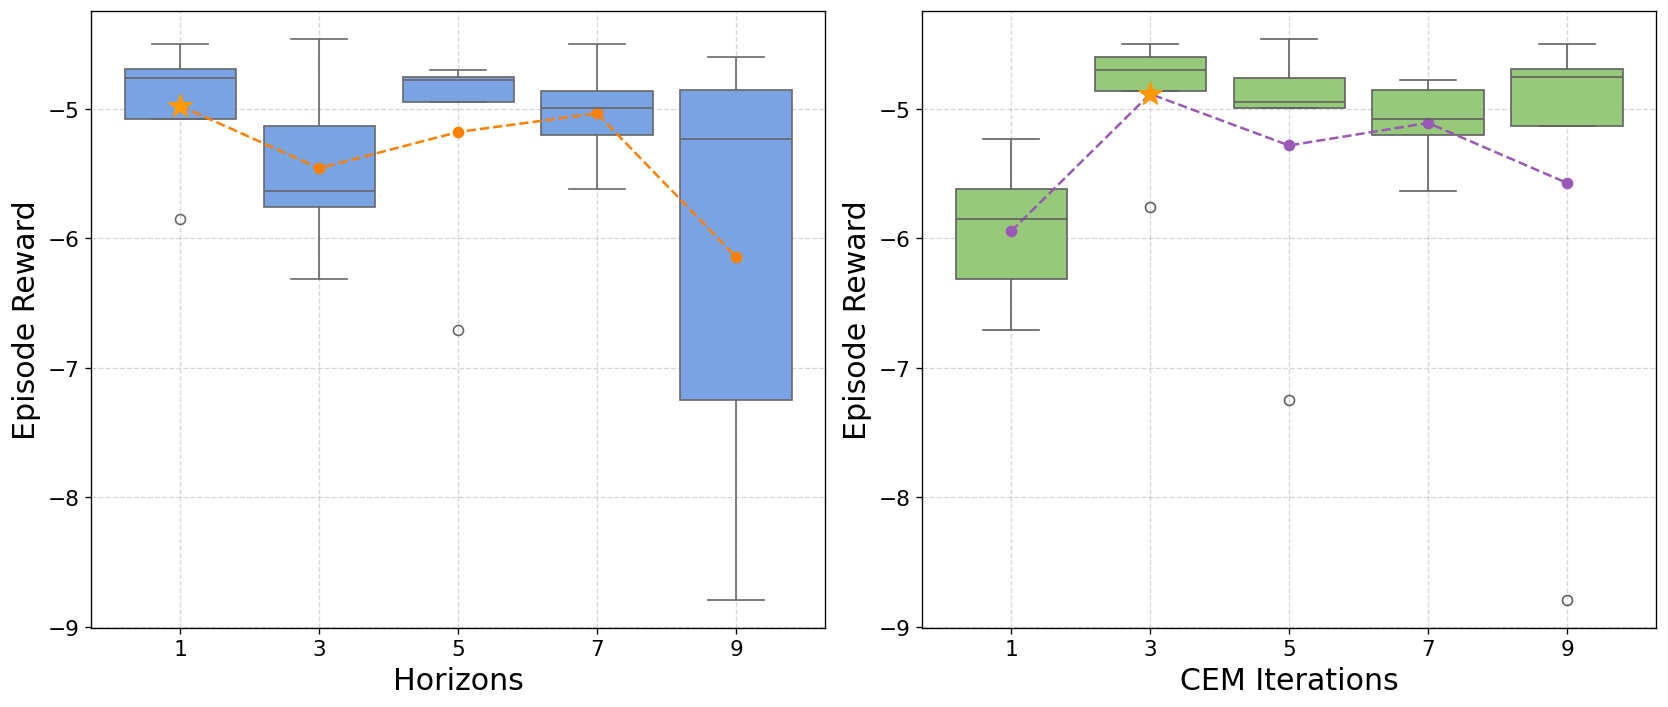

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and preprocess data
df = pd.read_csv("parameters.csv")
df.columns = [col.strip() for col in df.columns]
df["iterations"] = df["iterations"].astype(int)
df["horizons"] = df["horizons"].astype(int)

# Determine plotting order
horizon_order = sorted(df["horizons"].unique())
iter_order = sorted(df["iterations"].unique())

# Define plot colors
box_color_horizon = "#68a0f3"
mean_color_horizon = "#ff8000"
box_color_iter = "#93d66c"
mean_color_iter = "#9b59b6"
highlight_color = "#ff9900"

# Create subplots for Horizon and Iterations
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)

# Global font size settings
plt.rcParams.update({'xtick.labelsize': 13, 'ytick.labelsize': 13})
label_fontsize = 18

# ----- Plot 1: Reward vs Horizon -----
sns.boxplot(
    data=df, x="horizons", y="avg_reward", order=horizon_order,
    color=box_color_horizon, ax=axes[0], showfliers=True
)
mean_rewards_h = df.groupby("horizons")["avg_reward"].mean().reindex(horizon_order)
xticks_h = axes[0].get_xticks()
axes[0].plot(xticks_h, mean_rewards_h.values, color=mean_color_horizon, linestyle="--", marker="o")

# Highlight best point
max_idx_h = mean_rewards_h.idxmax()
max_val_h = mean_rewards_h.max()
max_xtick_h = xticks_h[horizon_order.index(max_idx_h)]
axes[0].scatter(max_xtick_h, max_val_h, color=highlight_color, s=200, marker="*", zorder=5)

axes[0].set_xlabel("Horizons", fontsize=label_fontsize)
axes[0].set_ylabel("Episode Reward", fontsize=label_fontsize)
axes[0].grid(True, linestyle="--", alpha=0.5)

# ----- Plot 2: Reward vs CEM Iterations -----
sns.boxplot(
    data=df, x="iterations", y="avg_reward", order=iter_order,
    color=box_color_iter, ax=axes[1], showfliers=True
)
mean_rewards_i = df.groupby("iterations")["avg_reward"].mean().reindex(iter_order)
xticks_i = axes[1].get_xticks()
axes[1].plot(xticks_i, mean_rewards_i.values, color=mean_color_iter, linestyle="--", marker="o")

# Highlight best point
max_idx_i = mean_rewards_i.idxmax()
max_val_i = mean_rewards_i.max()
max_xtick_i = xticks_i[iter_order.index(max_idx_i)]
axes[1].scatter(max_xtick_i, max_val_i, color=highlight_color, s=200, marker="*", zorder=5)

axes[1].set_xlabel("CEM Iterations", fontsize=label_fontsize)
axes[1].set_ylabel("Episode Reward", fontsize=label_fontsize)
axes[1].grid(True, linestyle="--", alpha=0.5)

# Final layout and save
plt.tight_layout()
plt.savefig("reward_vs_horizon_and_iterations.pdf", bbox_inches="tight")
plt.show()


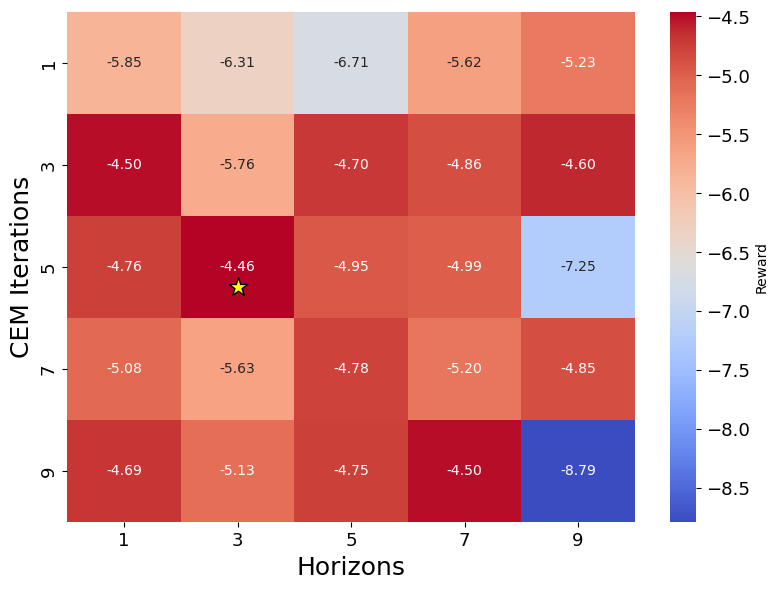

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("parameters.csv")

# Pivot the data to form a matrix: rows = iterations, columns = horizons
pivot_table = data.pivot(index="iterations", columns="horizons", values="avg_reward")

# Identify the maximum value and its coordinates
max_val = pivot_table.max().max()
max_coords = pivot_table.stack().idxmax()  # (iteration, horizon)

# Create heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    pivot_table, annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Reward'}
)

# Add a yellow star marker at the maximum reward location
horizons = pivot_table.columns.tolist()
iterations = pivot_table.index.tolist()
x = horizons.index(max_coords[1]) + 0.5
y = iterations.index(max_coords[0]) + 0.5
y_offset = 0.2
plt.scatter(x, y + y_offset, s=200, color='yellow', marker='*',
            edgecolor='black', zorder=5)

# Set font size for axis labels
ax.set_xlabel("Horizons", fontsize=18)
ax.set_ylabel("CEM Iterations", fontsize=18)

# Improve layout and save the figure
plt.tight_layout()
plt.savefig("reward_vs_hyperparams_heatmap.pdf", dpi=400)
plt.show()

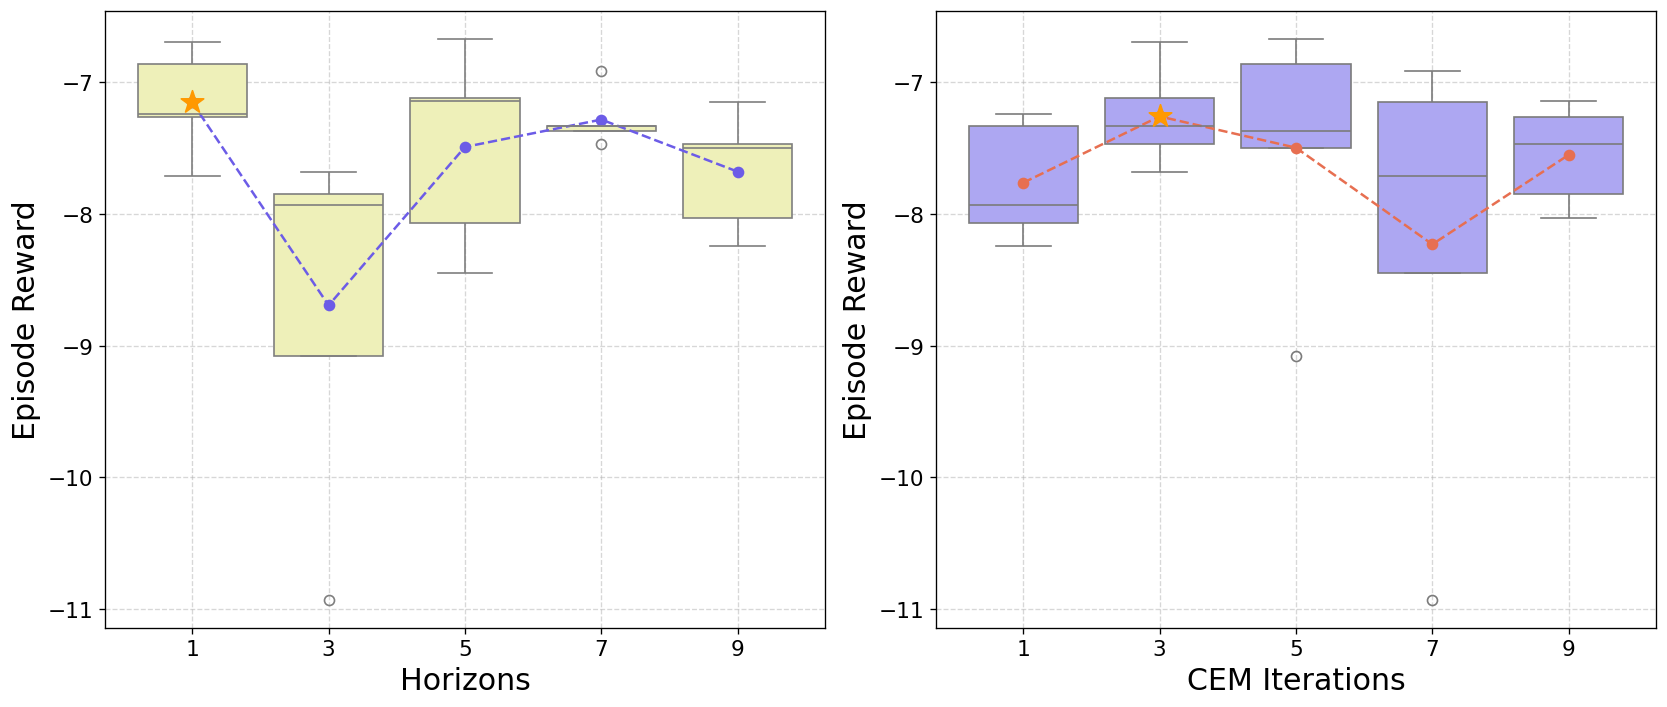

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv("parameters_tc.csv")
df.columns = [col.strip() for col in df.columns]
df["iterations"] = df["iterations"].astype(int)
df["horizons"] = df["horizons"].astype(int)

# Sort orders
horizon_order = sorted(df["horizons"].unique())
iter_order = sorted(df["iterations"].unique())

# Transformer-style colors
box_color_horizon = "#f7f9b0"      # vivid orange
mean_color_horizon = "#6c5ce7"  
highlight_color_h = "#ffbd00"      # bright gold star

box_color_iter = "#a29bfe"         # vivid light purple-blue
mean_color_iter = "#e76f51"     # bold blue-purple
highlight_color_i = "#ffbd00"      # same bright star for both



# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=120)
plt.rcParams.update({'xtick.labelsize': 13, 'ytick.labelsize': 13})
label_fontsize = 18

# --- Plot 1: Reward vs Horizon ---
sns.boxplot(
    data=df, x="horizons", y="avg_reward", order=horizon_order,
    color=box_color_horizon, ax=axes[0], showfliers=True
)
mean_rewards_h = df.groupby("horizons")["avg_reward"].mean().reindex(horizon_order)
xticks_h = axes[0].get_xticks()
axes[0].plot(xticks_h, mean_rewards_h.values, color=mean_color_horizon, linestyle="--", marker="o")

# Highlight best
max_idx_h = mean_rewards_h.idxmax()
max_val_h = mean_rewards_h.max()
max_xtick_h = xticks_h[horizon_order.index(max_idx_h)]
axes[0].scatter(max_xtick_h, max_val_h, color=highlight_color, s=200, marker="*", zorder=5)

axes[0].set_xlabel("Horizons", fontsize=label_fontsize)
axes[0].set_ylabel("Episode Reward", fontsize=label_fontsize)
axes[0].grid(True, linestyle="--", alpha=0.5)

# --- Plot 2: Reward vs Iterations ---
sns.boxplot(
    data=df, x="iterations", y="avg_reward", order=iter_order,
    color=box_color_iter, ax=axes[1], showfliers=True
)
mean_rewards_i = df.groupby("iterations")["avg_reward"].mean().reindex(iter_order)
xticks_i = axes[1].get_xticks()
axes[1].plot(xticks_i, mean_rewards_i.values, color=mean_color_iter, linestyle="--", marker="o")

# Highlight best
max_idx_i = mean_rewards_i.idxmax()
max_val_i = mean_rewards_i.max()
max_xtick_i = xticks_i[iter_order.index(max_idx_i)]
axes[1].scatter(max_xtick_i, max_val_i, color=highlight_color, s=200, marker="*", zorder=5)

axes[1].set_xlabel("CEM Iterations", fontsize=label_fontsize)
axes[1].set_ylabel("Episode Reward", fontsize=label_fontsize)
axes[1].grid(True, linestyle="--", alpha=0.5)

# Final output
plt.tight_layout()
plt.savefig("reward_vs_horizon_and_iterations_tc.pdf", bbox_inches="tight")
plt.show()


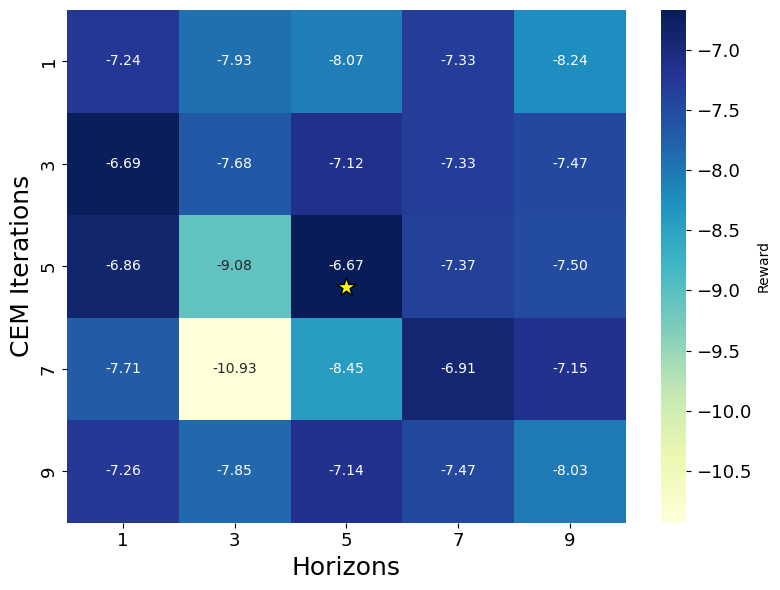

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("parameters_tc.csv")

# Pivot the data to form a matrix: rows = iterations, columns = horizons
pivot_table = data.pivot(index="iterations", columns="horizons", values="avg_reward")

# Identify the maximum value and its coordinates
max_val = pivot_table.max().max()
max_coords = pivot_table.stack().idxmax()  # (iteration, horizon)

# Create heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    pivot_table, annot=True, fmt=".2f", cmap="YlGnBu",
    cbar_kws={'label': 'Reward'}
)

# Add a yellow star marker at the maximum reward location
horizons = pivot_table.columns.tolist()
iterations = pivot_table.index.tolist()
x = horizons.index(max_coords[1]) + 0.5
y = iterations.index(max_coords[0]) + 0.5
y_offset = 0.2
plt.scatter(x, y + y_offset, s=200, color='yellow', marker='*',
            edgecolor='black', zorder=5)

# Set font size for axis labels
ax.set_xlabel("Horizons", fontsize=18)
ax.set_ylabel("CEM Iterations", fontsize=18)

# Improve layout and save the figure
plt.tight_layout()
plt.savefig("reward_vs_hyperparams_heatmap_tc.pdf", dpi=400)
plt.show()